In [1]:
import sys
import os
from icecream import ic

from pathlib import Path

import utils_behavior

from utils_behavior import Ballpushing_utils
from utils_behavior import Utils
from utils_behavior import Processing
from utils_behavior import HoloviewsTemplates

import pandas as pd
import hvplot.pandas
import numpy as np


# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
import pandas as pd
#import pyarrow.feather as feather

import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas



import matplotlib.pyplot as plt
import seaborn as sns



import holoviews as hv


hv.extension("bokeh")

In [2]:
# Get the path to the data

Datapath = Utils.get_data_path()

In [3]:
# Find folders with "Learning or learning" in the name as a list

folders = [f for f in Datapath.glob("*FeedingState*")]

folders

[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240718_Afternoon_FeedingState_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_PM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240718_Afternoon_FeedingState_next_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230705_FeedingState_2_AM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230706_FeedingState_3_PM_Flipped_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230725_FeedingState_PM_Dark_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230727_FeedingState_PM_Dark_Flip_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230705_FeedingState_2_PM_Videos_Tracked')]

In [4]:
# Take the first 

exp = Ballpushing_utils.Experiment(folders[0])

Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor1
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor4
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor2
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor6
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor3
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena7/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena7/corridor1
Loading fly from /mnt/upramdya_d

In [7]:
exp

Experiment(/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked)

In [5]:
# For each fly, get the ball positions

ball_positions = []

for fly in exp.flies:
    data = fly.balltrack.objects[0].dataset
    
    data["y_relative"] = abs(data["y_centre"] - data["y_centre"].iloc[0])
    data['fly'] = fly.name
    
    ball_positions.append(data)
    
ball_positions = pd.concat(ball_positions)

ball_positions.head()

#ball_positions['fly'].unique()
    
    

,frame,time,object,x_centre,y_centre,euclidean_distance,y_relative,fly
0,1,0.033333,ball_1,46.413479,331.692498,0.000000,0.000000,230704_FeedingState_1_AM_Videos_Tracked_arena2...
1,2,0.066667,ball_1,46.413505,331.692508,0.000028,0.000011,230704_FeedingState_1_AM_Videos_Tracked_arena2...
2,3,0.100000,ball_1,46.413530,331.692519,0.000056,0.000021,230704_FeedingState_1_AM_Videos_Tracked_arena2...
3,4,0.133333,ball_1,46.413556,331.692530,0.000084,0.000032,230704_FeedingState_1_AM_Videos_Tracked_arena2...
4,5,0.166667,ball_1,46.413582,331.692540,0.000112,0.000043,230704_FeedingState_1_AM_Videos_Tracked_arena2...


In [ ]:
ball_positions[]

In [30]:
# Now get the average ball positions grouped by time

grouped = ball_positions.groupby('time')["y_relative"].mean()

# Make it a dataframe

grouped = grouped.reset_index()

# Add co
grouped["ci"] = (ball_positions.groupby('time')["y_relative"].sem()) * 1.96


grouped

,time,y_relative,ci
0,0.033333,0.000000,NaN
1,0.066667,0.000284,0.004027
2,0.100000,0.000568,0.008193
3,0.133333,0.000853,0.012360
4,0.166667,0.001137,0.016060
...,...,...,...
215995,7199.866667,93.664370,NaN
215996,7199.900000,93.664707,NaN
215997,7199.933333,93.665045,NaN
215998,7199.966667,93.665382,NaN


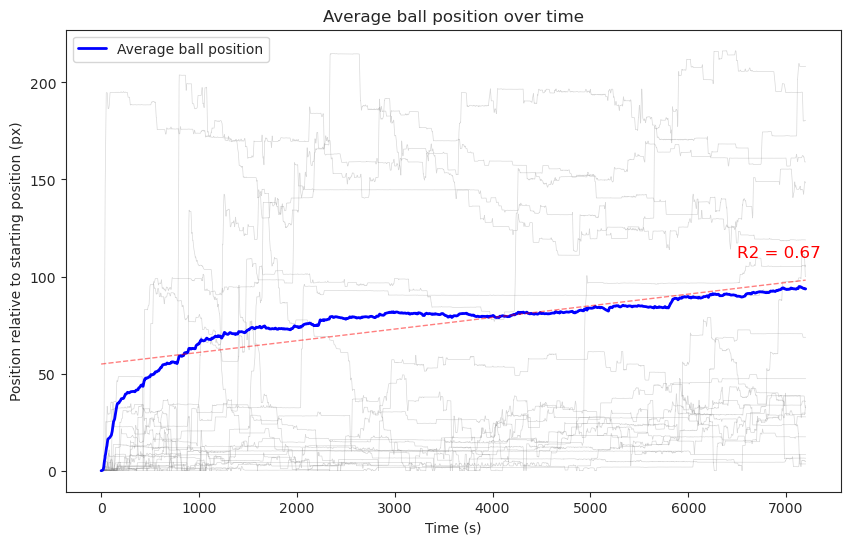

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

sns.set_style("white")
sns.set_style("ticks")

# For each fly, get the ball positions
ball_positions = []

for fly in exp.flies:
    data = fly.balltrack.objects[0].dataset
    
    data["y_relative"] = abs(data["y_centre"] - data["y_centre"].iloc[0])
    data['fly'] = fly.name
    
    ball_positions.append(data)
    
ball_positions = pd.concat(ball_positions)

# Sample 20 flies from the pool of exp.flies
sampled_flies = np.random.choice(ball_positions['fly'].unique(), 20, replace=False)

# Now get the average ball positions grouped by time
grouped = ball_positions.groupby('time')["y_relative"].mean().reset_index()

# Plot the individual ball relative positions over time in thin gray lines for the sampled flies
plt.figure(figsize=(10, 6))
for fly in sampled_flies:
    sns.lineplot(x='time', y='y_relative', data=ball_positions[ball_positions['fly'] == fly], color='gray', alpha=0.3, linewidth=0.5)

# Plot the average ball positions over time in a thicker line
sns.lineplot(x='time', y='y_relative', data=grouped, label='Average ball position', color='blue', linewidth=2)

# Add a linear regression line to the plot and annotate the R2
slope, intercept, r_value, p_value, std_err = linregress(grouped['time'], grouped['y_relative'])
plt.plot(grouped['time'], slope * grouped['time'] + intercept, color='red', linestyle='--', alpha=0.5, label='Linear regression', linewidth=1)

# Add the R2 to the plot
plt.text(6500, 110, f"R2 = {r_value**2:.2f}", fontsize=12, color='red')

# Add title and labels
plt.title('Average ball position over time')
plt.xlabel('Time (s)')
plt.ylabel('Position relative to starting position (px)')
#plt.legend()
plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/Article_Affordance/average_ball_position_over_time.png")
plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/Article_Affordance/average_ball_position_over_time.svg")
# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
Dataset = Ballpushing_utils.Dataset(exp)

In [ ]:
Dataset.generate_dataset(success_cutoff=False)

In [ ]:
Dataset.data.columns

In [ ]:
# Plot the yball_relative as a function of time grouped by individual flies

# curves = hv.Curve(Dataset.data, kdims=["time"], vdims=["yball_relative","fly"]).groupby("fly").overlay()

# curves.opts(width=800, height=400)

In [ ]:
from holoviews import opts
from bokeh.palettes import viridis

Tries = 30

NbFlies = 7

for i in range(Tries):

    # Pick random flies and plot their yball_relative as a function of time
    flies = np.random.choice(Dataset.data.fly.unique(), NbFlies)

    # Generate a Viridis palette with adapted number of colors colors
    viridis_palette = viridis(NbFlies)

    # Create the curves and overlay them
    curves = (
        hv.Curve(
            Dataset.data[Dataset.data.fly.isin(flies)],
            kdims=["time"],
            vdims=["yball_relative", "fly"],
        )
        .groupby("fly")
        .overlay()
    )

    curves = curves.opts(
        opts.Curve(
            width=800,
            height=400,
            show_grid=True,
            show_legend=False,
            ylabel="ball position relative to start (px)",
            xlabel="time (s)",
            
        )
    )

    # Apply the viridis colormap
    curves = curves.opts(opts.Curve(color=hv.Cycle(values=list(viridis_palette))))

    hv.save(curves, f"/mnt/upramdya_files/DURRIEU_Matthias/DlsImgs/testcurves{i}.png")